# Churn prediction case study

## Problem Statement - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

In [467]:
df_data=pd.read_csv("churn_dataset.csv")

In [468]:
df_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [469]:
df_data.shape

(7043, 21)

In [470]:
df_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [471]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

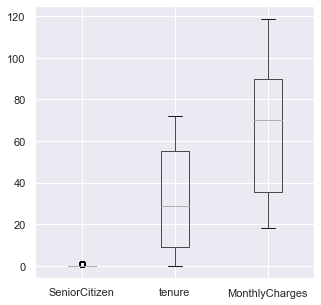

In [472]:
df_data.boxplot()

<AxesSubplot:xlabel='SeniorCitizen'>

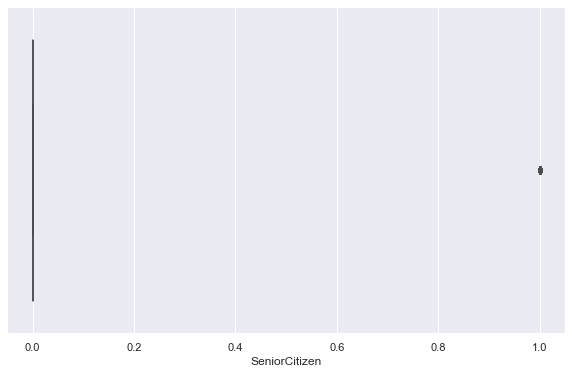

In [473]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df_data.SeniorCitizen)

In [474]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [475]:
df_data.drop(labels="customerID",axis=1,inplace=True)

In [476]:
df_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [477]:
df_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [478]:
df_data.shape

(7043, 20)

In [479]:
df_data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [480]:
df_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

## Data Cleaning


In [481]:
df = df_data.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [482]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [483]:

df.loc[df['TotalCharges'].isnull(),'TotalCharges'] = 0  # reset oll null charges

In [484]:
df.loc[df['TotalCharges'].isnull(),'TotalCharges'] = 0  # reset oll null charges
df.isnull().sum()  # No Null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

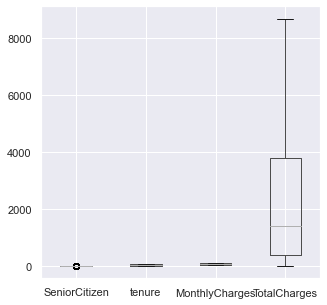

In [485]:
df.boxplot()

In [486]:
df.shape

(7043, 20)

## Data Exploration


### Univariate Analysis

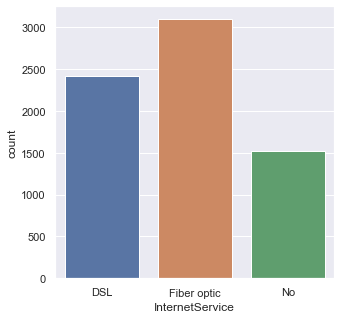

In [487]:
sns.countplot(df['InternetService'])
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

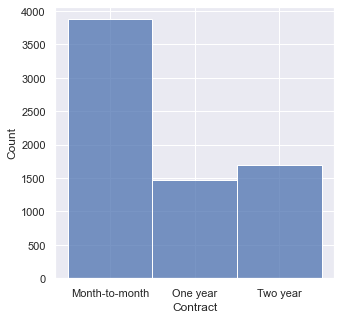

In [488]:
sns.histplot(df['Contract']);

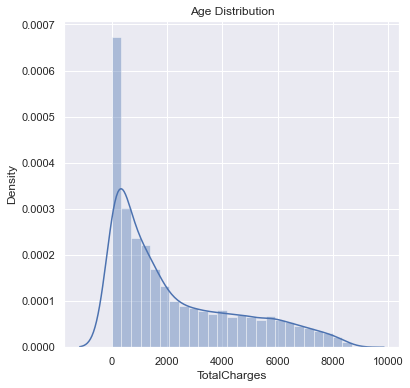

In [489]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['TotalCharges'])
plt.title('Age Distribution')
plt.show()

## Bivariate analysis

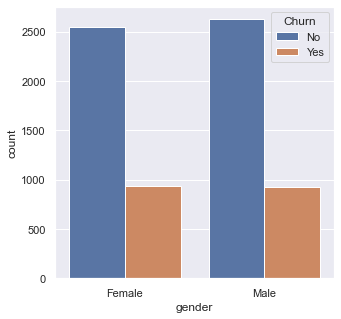

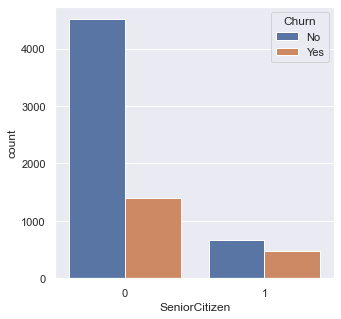

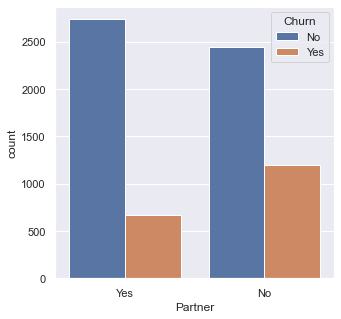

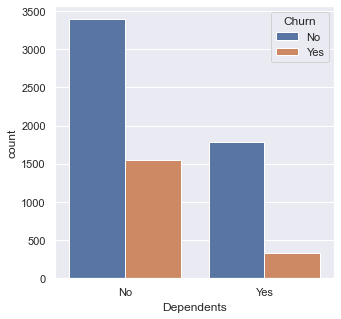

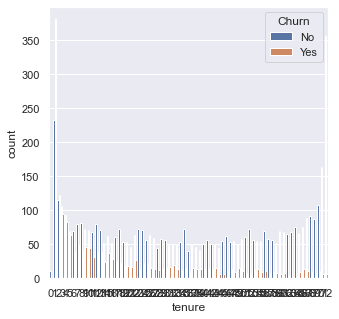

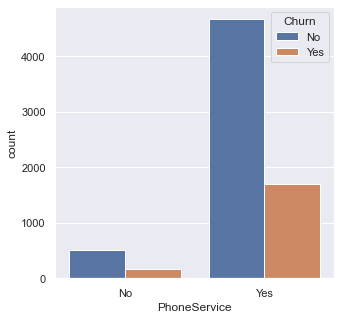

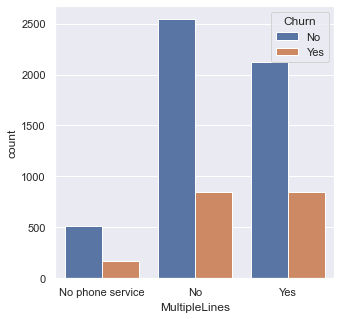

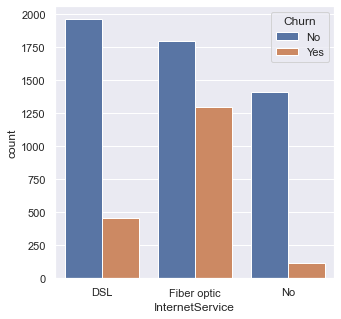

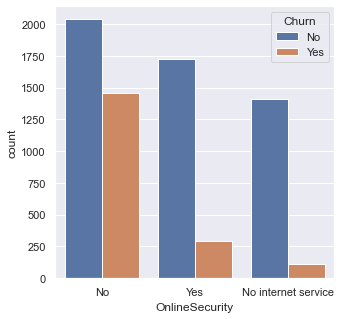

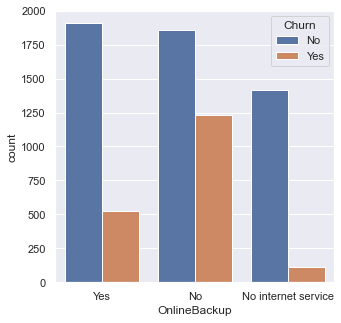

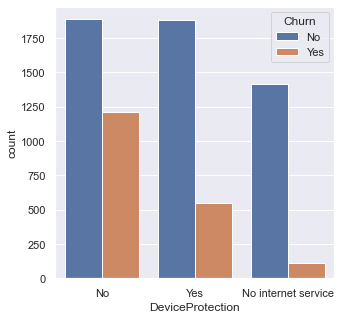

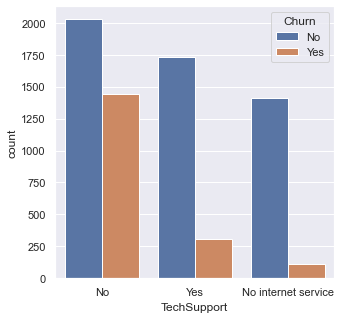

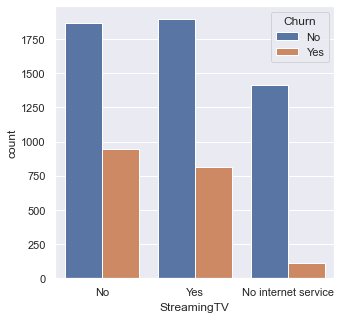

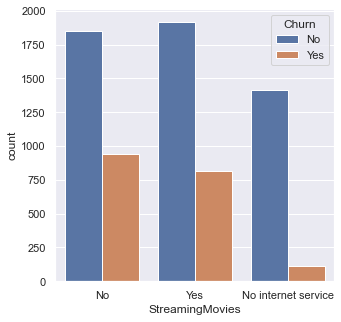

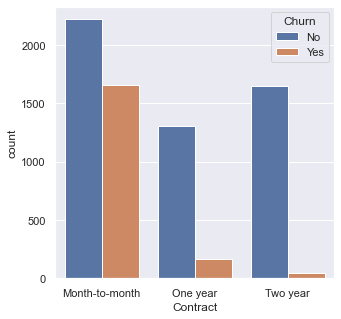

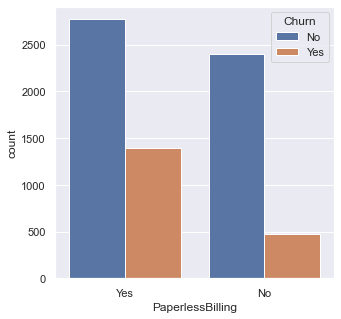

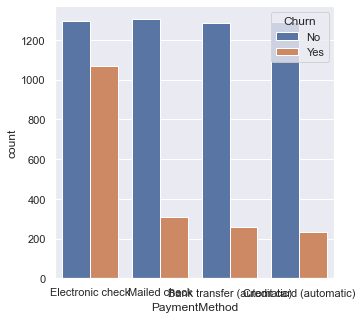

In [491]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

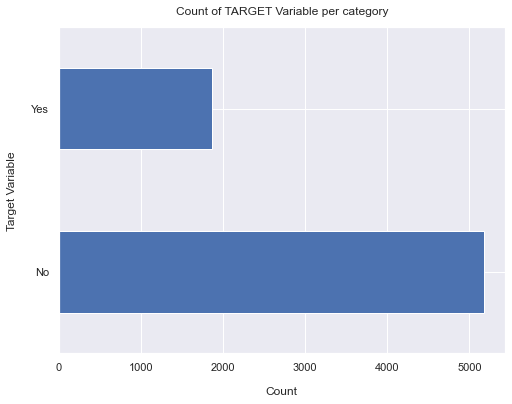

In [492]:
df_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

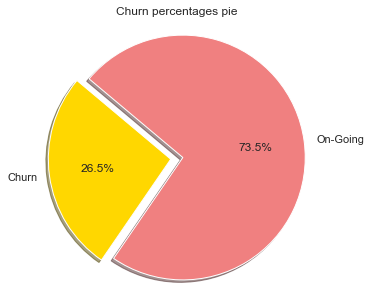

In [493]:
# Churn pie plot
labels = 'Churn', 'On-Going'
fls, tru = df['Churn'].value_counts() 
sizes = [tru, fls]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Churn percentages pie')
plt.axis('equal')
plt.show()

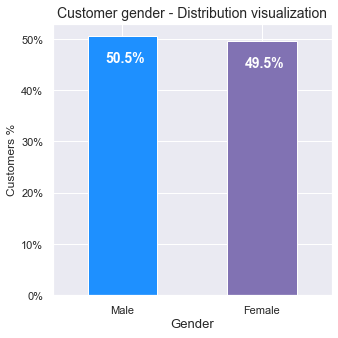

In [494]:
# Customer gender - Distribution plot
ax = (df['gender'].value_counts()*100.0 / len(df)).plot(kind='bar',stacked=True,rot=0,
                                                                                color=['dodgerblue','m'])
totals = []
# create a list of values
for i in ax.patches:
    totals.append(i.get_width())    
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Gender', size = 13)
ax.set_ylabel('Customers %')
ax.set_title('Customer gender - Distribution visualization', size = 14)
total = sum(totals)
# set text and position (get_x pulls left or right; get_y pushes up or down)
for i in ax.patches:
    ax.text(i.get_x()+0.13, i.get_height()-5,str(round((i.get_height()/total), 1))+'%', 
            fontsize=14, color='white',weight = 'bold')

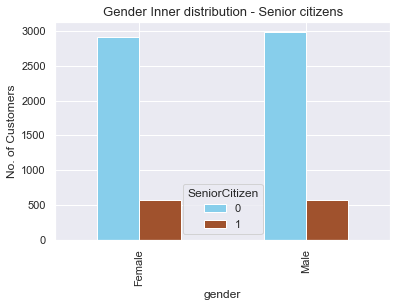

In [495]:
# Senior citizens by Gender plot
ax = df.groupby(['gender', 'SeniorCitizen'] )['SeniorCitizen'].count().unstack(1).plot.bar(
    figsize=(6, 4),color=('skyblue','sienna'))
                                                                                                       
ax.set_ylabel('No. of Customers')                                                                                                    
ax.set_title('Gender Inner distribution - Senior citizens', size =13);

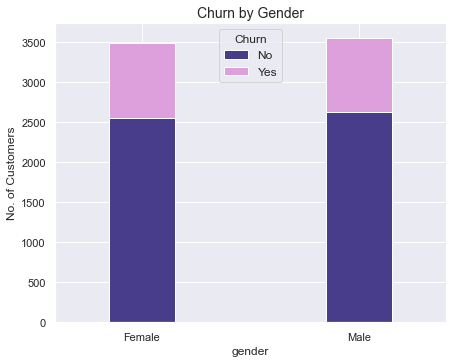

In [496]:
# Churn by Gender plot
churn_genger = df.groupby(['gender','Churn']).size().unstack()

ax = churn_genger.plot(kind='bar', width = 0.3, stacked = True, rot = 0, 
                                                          figsize = (7,5.5), color = ['darkslateblue','plum'])
ax.legend(loc='upper center',prop={'size':12},title = 'Churn')
ax.set_ylabel('No. of Customers')
ax.set_title('Churn by Gender',size = 14);

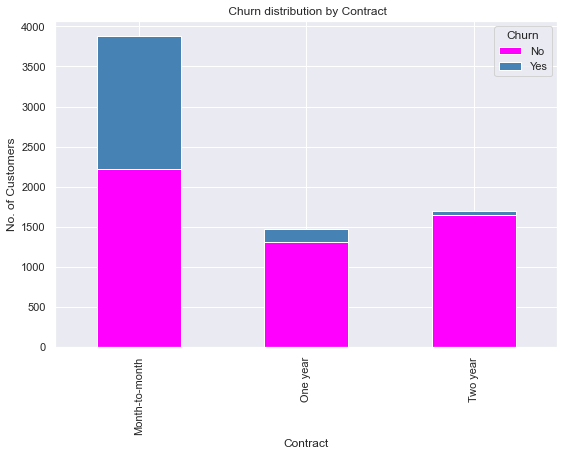

In [497]:
# Churn distribution by Contract
ax = df.groupby(['Contract','Churn']).size().unstack().plot(kind = 'bar',
                                                                        stacked = True,
                                                                        figsize = (9,6),
                                                                        color=['fuchsia','steelblue','blueviolet'])
ax.set_ylabel('No. of Customers')
ax.set_title(' Churn distribution by Contract');

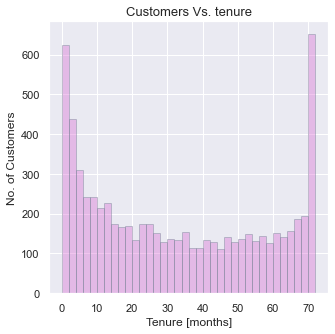

In [498]:
# Customers Vs. tenure plot
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'orchid', 
             hist_kws={'edgecolor':'slategrey'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure [months]')
ax.set_title('Customers Vs. tenure', size = 13);

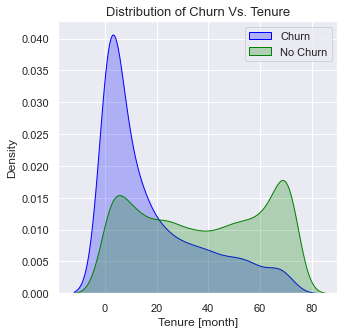

In [499]:
# Churn Vs. Tenure Distribution plot
ax = sns.kdeplot(df.tenure[(df['Churn'] == 'Yes') ],
                color="blue", shade = True)
ax = sns.kdeplot(df.tenure[(df['Churn'] == 'No') ],
                ax =ax, color="green", shade= True)
ax.legend(['Churn', 'No Churn'], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure [month]')
ax.set_title('Distribution of Churn Vs. Tenure', size = 13);

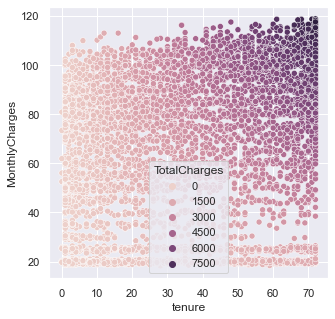

In [565]:
sns.scatterplot(data=df,x=df['tenure'],y=df['MonthlyCharges'],hue=df['TotalCharges'])
plt.show()

## Multivariate analysis

<AxesSubplot:>

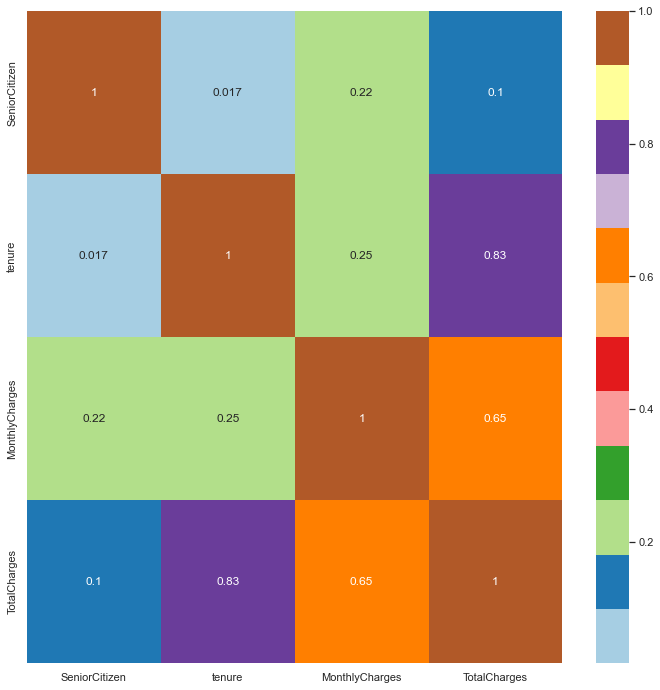

In [568]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired",annot=True)

## splitting the data into four parts

In [500]:
y=df[['Churn']]
X=df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [501]:
X.shape

(7043, 19)

In [502]:
y.shape

(7043, 1)

In [503]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282, 1)
(1761, 19) (1761, 1)


## Separating Categorical and Numerical Columns

In [504]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [505]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [506]:
y_train.head()

,Churn
3296,No
6397,No
6043,Yes
5309,No
3000,Yes


In [507]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

## separating the numerical and categorical data

In [508]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


In [509]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [510]:
X_train_cat_nominal = X_train_cat[['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','InternetService','PaymentMethod']]
X_train_cat_ordinal = X_train_cat[['Contract']]

In [511]:
X_train_cat_nominal.shape

(5282, 14)

In [512]:
X_train_cat_ordinal.shape

(5282, 1)

In [513]:
X_train_cat_nominal.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService,PaymentMethod
3296,Female,No,No,Yes,No,No,No,Yes,No,No,No,Yes,DSL,Credit card (automatic)
6397,Male,No,No,Yes,No,No,No,Yes,Yes,No,Yes,No,DSL,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,No,No,Yes,No,Yes,No,Yes,DSL,Mailed check
5309,Female,Yes,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Fiber optic,Electronic check


In [514]:
X_train_cat_nominal['gender'].value_counts(normalize=True)

Female    0.502272
Male      0.497728
Name: gender, dtype: float64

In [515]:
X_train_cat_nominal['Partner'].value_counts(normalize=True)

No     0.515524
Yes    0.484476
Name: Partner, dtype: float64

In [516]:
X_train_cat_nominal['Dependents'].value_counts(normalize=True)

No     0.698788
Yes    0.301212
Name: Dependents, dtype: float64

In [517]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat_nominal), 
                               columns=ohe.get_feature_names_out(X_train_cat_nominal.columns), 
                               index = X_train_cat_nominal.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [518]:
X_train_cat_ohe.shape

(5282, 24)

In [519]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_ordinal.index)

X_train_cat_le.head()

""
3296
6397
6043
5309
3000


In [520]:
X_train_cat_ordinal.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [521]:
Contract_encoder = {'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3}

X_train_cat_le['Contract'] = X_train_cat_ordinal['Contract'].apply(lambda x : Contract_encoder[x])

X_train_cat_le.head()

,Contract
3296,1
6397,2
6043,1
5309,3
3000,1


In [522]:
X_train_cat_transformed = pd.concat([X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
5309,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3
3000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1


In [523]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,-0.435476,-0.340191,-0.514314,-0.460284
6397,2.296336,0.883210,0.017840,0.556508
6043,-0.435476,-1.196572,-0.819594,-0.948382
5309,-0.435476,1.168670,-1.483535,-0.440119
3000,-0.435476,-0.829552,0.658427,-0.537185


In [524]:
X_train_num_rescaled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.282000e+03,5.282000e+03,5.282000e+03,5.282000e+03
mean,-5.258846e-16,-1.107701e-16,-3.584158e-16,-3.840169e-17
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-4.354763e-01,-1.318912e+00,-1.550263e+00,-1.006268e+00
25%,-4.354763e-01,-9.518918e-01,-9.663949e-01,-8.258984e-01
50%,-4.354763e-01,-1.362912e-01,1.863278e-01,-3.879773e-01
75%,-4.354763e-01,9.239896e-01,8.369237e-01,6.627499e-01
max,2.296336e+00,1.617250e+00,1.799472e+00,2.838659e+00


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [525]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3296,-0.435476,-0.340191,-0.514314,-0.460284,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
6397,2.296336,0.883210,0.017840,0.556508,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6043,-0.435476,-1.196572,-0.819594,-0.948382,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
5309,-0.435476,1.168670,-1.483535,-0.440119,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3
3000,-0.435476,-0.829552,0.658427,-0.537185,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1


### Preparing Test Data

In [526]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [527]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   object

In [528]:
X_test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [529]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0,19,58.20,1045.25
4627,0,60,116.60,7049.50
3225,0,13,71.95,923.85
2828,0,1,20.45,20.45
3768,0,55,77.75,4266.40


In [530]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [531]:
X_test_cat_nominal = X_test_cat[['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','InternetService','PaymentMethod']]
X_test_cat_ordinal = X_test_cat[['Contract']]

In [532]:
X_test_cat_nominal.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService,PaymentMethod
2200,Female,No,No,Yes,No,No,Yes,No,No,Yes,No,No,DSL,Electronic check
4627,Male,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Fiber optic,Credit card (automatic)
3225,Female,No,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,DSL,Electronic check
2828,Male,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,No,Mailed check
3768,Female,Yes,No,Yes,Yes,No,Yes,No,No,No,No,Yes,Fiber optic,Credit card (automatic)


In [533]:
X_test_cat_ordinal.head()

,Contract
2200,One year
4627,One year
3225,Month-to-month
2828,Two year
3768,Month-to-month


In [534]:
X_test_cat_le = pd.DataFrame(index = X_test_cat_ordinal.index)

X_test_cat_le.head()

""
2200
4627
3225
2828
3768


In [535]:
X_test_cat_le['Contract'] = X_test_cat_ordinal['Contract'].apply(lambda x : Contract_encoder[x])

X_test_cat_le.head()

,Contract
2200,2
4627,2
3225,1
2828,3
3768,1


In [536]:
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat_nominal),columns=ohe.get_feature_names_out(X_test_cat_nominal.columns),index = X_test_cat_nominal.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3768,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [537]:
X_test_cat_transformed = pd.concat([X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4627,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2828,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
3768,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1


In [538]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,-0.435476,-0.544091,-0.217375,-0.543516
4627,-0.435476,1.127890,1.731076,2.114680
3225,-0.435476,-0.788772,0.241378,-0.597262
2828,-0.435476,-1.278132,-1.476862,-0.997214
3768,-0.435476,0.923990,0.434889,0.882549


In [539]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
2200,-0.435476,-0.544091,-0.217375,-0.543516,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4627,-0.435476,1.127890,1.731076,2.114680,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2
3225,-0.435476,-0.788772,0.241378,-0.597262,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2828,-0.435476,-1.278132,-1.476862,-0.997214,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
3768,-0.435476,0.923990,0.434889,0.882549,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1


## Logistic Regression

In [540]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [541]:
y_test_pred = lr.predict(X_test_transformed)

In [542]:
from sklearn.metrics import accuracy_score

lr_score = accuracy_score(y_test, y_test_pred)
lr_score

0.7984099943214082

## KNN Classification

In [543]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [544]:
y_test_pred = knn.predict(X_test_transformed)

In [545]:
from sklearn.metrics import accuracy_score

knn_score = accuracy_score(y_test, y_test_pred)
knn_score

0.7467348097671778

## Decision Tree Classifier

In [546]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [547]:
y_test_pred = dtc.predict(X_test_transformed)

In [548]:
from sklearn.metrics import accuracy_score

dtc_score = accuracy_score(y_test, y_test_pred)
dtc_score

0.7331061896649631

## Naive Bayes Classification

In [549]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train_transformed, y_train)

GaussianNB()

In [550]:
y_test_pred = nbc.predict(X_test_transformed)

In [551]:
from sklearn.metrics import accuracy_score

nbc_score = accuracy_score(y_test, y_test_pred)
nbc_score

0.6706416808631459

## Support Vector Classifier

In [552]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

SVC()

In [553]:
y_test_pred = svc.predict(X_test_transformed)

In [554]:
from sklearn.metrics import accuracy_score

svc_score = accuracy_score(y_test, y_test_pred)
svc_score

0.7847813742191937

## Random Forest Classifier¶

In [555]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [556]:
y_test_pred = rfc.predict(X_test_transformed)

In [557]:
from sklearn.metrics import accuracy_score

rfc_score = accuracy_score(y_test, y_test_pred)
rfc_score

0.7830777967064169

## Gradient Boost Classifier

In [558]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [559]:
y_test_pred = gbc.predict(X_test_transformed)

In [560]:
from sklearn.metrics import accuracy_score

gbc_score = accuracy_score(y_test, y_test_pred)
gbc_score

0.7887563884156729

In [561]:
models = [('Logistic Regression',lr_score),
          ('KNN Clasification',knn_score),
          ('Decision Tree Classification',dtc_score),
          ('Naive Bayes Classification',nbc_score),
          ('Support Vector Classification',svc_score),
          ('Random Forest Classification',rfc_score),
          ('Gradient Boosting Classification',gbc_score)]

In [562]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Accuracy_score'])
predict.sort_values(by = 'Accuracy_score', ascending = False)

,Algorithm,Accuracy_score
0,Logistic Regression,0.798410
6,Gradient Boosting Classification,0.788756
4,Support Vector Classification,0.784781
5,Random Forest Classification,0.783078
1,KNN Clasification,0.746735
2,Decision Tree Classification,0.733106
3,Naive Bayes Classification,0.670642


<AxesSubplot:xlabel='Accuracy_score', ylabel='Algorithm'>

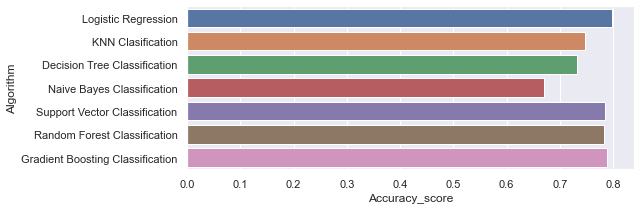

In [563]:
plt.figure(figsize = (8,3))
sns.barplot(x = predict['Accuracy_score'], y = predict['Algorithm'])

## conclusion

### Logistic Regression  model provided the best estimation results with an accuracy of 79%%.# 